# 7 Seoul Food

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [36]:
fontpath = '/usr/share/fonts/NanumGothic.ttf'
fname = mpl.font_manager.FontProperties(fname=fontpath).get_name()

In [37]:
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

In [38]:
# deprecate 관련 경고는 무시하도록 설정
import warnings
warnings.filterwarnings('ignore')

In [39]:
# 일단 csv 파일을 불러오시고 head함수로 정보를 보자.

pd.set_option('display.max_columns', 100) # 컬럼 100개를 보여주는 함수 

sf = pd.read_csv('seoul_food.csv') 
sf.head()   # 50개 컬럼이 다 안보임 - set_option 설정
            # 너무 많은 컬럼이 출력됨. 쓸데없는 컬럼은 모두 지우는 게 나을 것이다. 가시성 확보를 위해서, 중요하지 않은 정보와 중요한 정보를 구별하고,
            # 어떤 컬럼들은 데이터가 없고, 어떤 컬럼들은 있다. 이것을 결측치라 하고, 그것을 처리하는 것. 전처리 작업을 거친다는 것이다.

,Unnamed: 0,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총인원,본사종업원수,공장사무직종업원수,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,지역구,open,closed,경도,위도
0,0,3010000,3010000-104-2020-00245,20201229,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,10.00,100440.0,서울특별시 중구 황학동 2545 이마트 청계천점,서울특별시 중구 청계천로 400 지하2층 (황학동 롯데캐슬베네치아),4572.0,통불 이마트청계천점,20201229130352,I,2019-11-01 21:01:00.0,일반조리판매,201823.908977,452076.818664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,중구,2020,NaN,127.021434,37.570978
1,1,3070000,3070000-104-2020-00105,20200713,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,6.60,136110.0,서울특별시 성북구 길음동 1280-6 대우상가,서울특별시 성북구 길음로 103 대우상가 상가동 1층 105106호 (길음동),2714.0,씨유 길음푸르지오점,20200713175725,I,2019-12-06 23:05:00.0,편의점,201517.385330,456504.561867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,성북구,2020,NaN,127.017973,37.610872
2,2,3230000,3230000-104-2020-00227,20200713,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,329.89,138827.0,서울특별시 송파구 방이동 44-3 현대토픽스,서울특별시 송파구 위례성대로 6 1층 (방이동),5544.0,스타벅스,20200713162510,I,2019-12-06 23:05:00.0,커피숍,209929.574783,446085.121305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,2020,NaN,127.113106,37.516942
3,3,3050000,3050000-104-2020-00106,20200713,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,26.00,130850.0,서울특별시 동대문구 전농동 38-104,서울특별시 동대문구 전농로16길 54 1층 (전농동),2508.0,Min's coffee,20200713161446,I,2019-12-06 23:05:00.0,커피숍,205263.826419,452869.992526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동대문구,2020,NaN,127.060378,37.578112
4,4,3080000,3080000-104-2020-00065,20200713,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,32.00,142870.0,서울특별시 강북구 수유동 413-25,서울특별시 강북구 삼양로87길 46 1층 (수유동),1090.0,탑브릭스,20200713160435,I,2019-12-06 23:05:00.0,일반조리판매,201292.010942,459312.320008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강북구,2020,NaN,127.015425,37.636170


In [40]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108372 entries, 0 to 108371
Data columns (total 50 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  108372 non-null  int64  
 1   개방자치단체코드    108372 non-null  int64  
 2   관리번호        108372 non-null  object 
 3   인허가일자       108372 non-null  int64  
 4   인허가취소일자     0 non-null       float64
 5   영업상태코드      108372 non-null  int64  
 6   영업상태명       108372 non-null  object 
 7   상세영업상태코드    108372 non-null  int64  
 8   상세영업상태명     108372 non-null  object 
 9   폐업일자        74441 non-null   float64
 10  휴업시작일자      0 non-null       float64
 11  휴업종료일자      0 non-null       float64
 12  재개업일자       0 non-null       float64
 13  전화번호        56882 non-null   object 
 14  소재지면적       100325 non-null  float64
 15  소재지우편번호     108187 non-null  float64
 16  지번주소        108189 non-null  object 
 17  도로명주소       66753 non-null   object 
 18  도로명우편번호     66077 non-null   float64
 19  사업

### NaN은 결측치다. 위에 보면 5 rows x 50 columns, 행 50개, 컬럼 50개라는 정보를 파악하자.
### drop 시켜서 다 지울 수 있지만, 모두 지우는게 다 능사는 아니다. 차라리 지우는 것보다, 필요한 컬럼만 추려서 따로 데이터 프레임을 만드시는게 나을 것 같다. 
### 전처리 할 필요 없이 말이다.

### * 자 한번 보자. 분석에 유용한 컬럼들만 추출해서 새로운 데이터 프레임을 생성하자. 
### * 우리가 이걸 통해서 뭘 알고 싶은지 알아야지!
### * 예를 들어서, 내가 음식점을 창업을 하려고 한다. 그럼 무엇을 통해서 내가 필요한 데이터를 확보할 수 있는지 확인해 보자. 
### * 여기서 유용하다고 생각할 수 있는 컬럼들이 무엇이 있을까??

In [41]:
# let's do it.


# 첫번째 사업장명을 넣어보자. 인덱스로 가져오자. 사업장명. 19번을 쓰시고. 지역구도 중요해. 45번
# 'open',과 ''close', '다중이용업소 여부 40번, 업태구분명 23번. 위치(경도,위도)

sf.columns

sf1 = sf.iloc[:, [19,45,23,46,47,40,16,48,49,]] # iloc 함수가 분류하는 것인가? 
sf1.head()

,사업장명,지역구,업태구분명,open,closed,다중이용업소여부,지번주소,경도,위도
0,통불 이마트청계천점,중구,일반조리판매,2020,NaN,NaN,서울특별시 중구 황학동 2545 이마트 청계천점,127.021434,37.570978
1,씨유 길음푸르지오점,성북구,편의점,2020,NaN,NaN,서울특별시 성북구 길음동 1280-6 대우상가,127.017973,37.610872
2,스타벅스,송파구,커피숍,2020,NaN,NaN,서울특별시 송파구 방이동 44-3 현대토픽스,127.113106,37.516942
3,Min's coffee,동대문구,커피숍,2020,NaN,NaN,서울특별시 동대문구 전농동 38-104,127.060378,37.578112
4,탑브릭스,강북구,일반조리판매,2020,NaN,NaN,서울특별시 강북구 수유동 413-25,127.015425,37.636170


# 이렇게 하니까 원하는 데이터만 추려서 파악이 가능해졌다. you got it?

In [42]:
# 음식점 종류 알아보기.
사업장 = sf1.사업장명.value_counts() 
사업장.sort_values(ascending=False).head(20) # 20개만 찍어보자 # sort_values(ascending=False)는 내림차순 정렬을 해주는 함수

이디야       735
스타벅스      643
롯데리아      443
던킨도너츠     331
커피빈       316
투썸플레이스    311
베스킨라빈스    283
탐앤탐스      222
엔제리너스     208
요거프레소     204
버거킹       201
피자스쿨      193
카페베네      188
맥도날드      175
할리스커피     166
빽다방       140
파스쿠찌      140
이삭토스트     107
도미노피자     102
약속         98
Name: 사업장명, dtype: int64

### 아하, 서울시 내에 있는 음식점 중에서 커피가 가장 수요가 많다는 것을 이렇게 해서 확인하였다!!

In [43]:
사업장30 = 사업장.sort_values(ascending=False).head(30)
사업장30

이디야         735
스타벅스        643
롯데리아        443
던킨도너츠       331
커피빈         316
투썸플레이스      311
베스킨라빈스      283
탐앤탐스        222
엔제리너스       208
요거프레소       204
버거킹         201
피자스쿨        193
카페베네        188
맥도날드        175
할리스커피       166
빽다방         140
파스쿠찌        140
이삭토스트       107
도미노피자       102
약속           98
크라운베이커리      95
KFC          80
맘스터치         77
약속다방         75
독일제과         71
피자나라치킨공주     69
마이빈          69
석봉토스트        69
초원           67
신라명과         66
Name: 사업장명, dtype: int64

#### 자 이제 plot 함수로 그래프 그려보자!!

<AxesSubplot:>

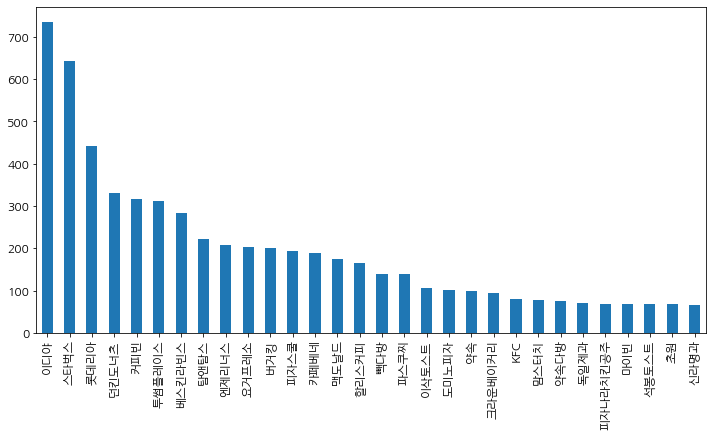

In [46]:
사업장30.plot(kind='bar', figsize=(12,6)) # 막대니까 (kind='bar') 함수 사용

### 막대그래프의 포인트는 단색은 큰 의미가 없다. 구분을 위해서 색을 넣어야 한다.

<AxesSubplot:title={'center':'사업장 현황'}, ylabel='점포수'>

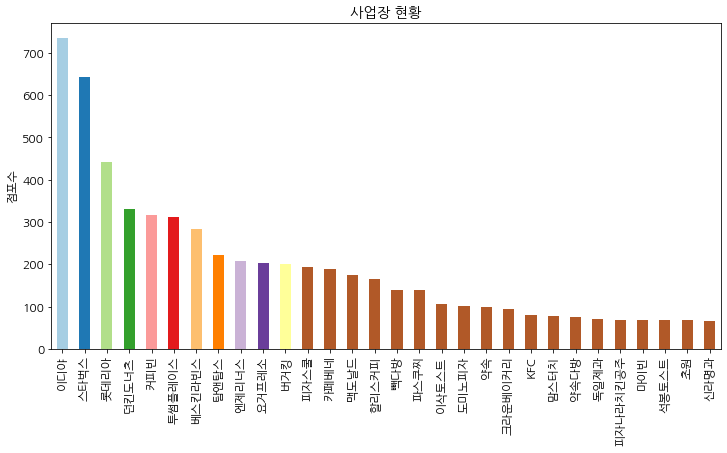

In [60]:
# color=plt.cm(칼라맵).Paired(30)))

사업장30.plot(kind='bar', figsize=(12,6), title='사업장 현황', ylabel='점포수', color=plt.cm.Paired(np.arange(30)))

### https://matplotlib.org/stable/tutorials/colors/colormaps.html <- 이 사이트에서 맷플롭립의 다양한 컬러 타입을 사용할 수 있다. 기억하자!

<AxesSubplot:title={'center':'사업장 현황'}, ylabel='점포수'>

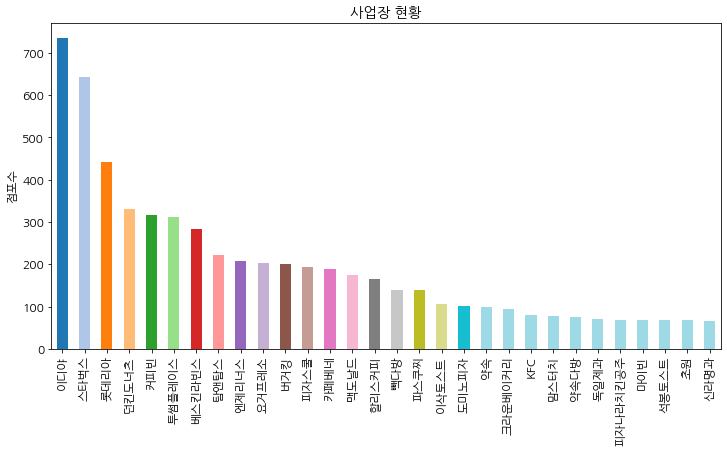

In [62]:
사업장30.plot(kind='bar', figsize=(12,6), title='사업장 현황', ylabel='점포수', color=plt.cm.tab20(np.arange(30)))

### tab 20이란 컬러맵을 사용하였다. 물론 그 전보다는 다양한 색상을 표현이 가능하지만, 여전히 하위권 그래프들은 여전히 같은 막대그래프 색깔이다.

<AxesSubplot:title={'center':'사업장 현황'}, ylabel='점포수'>

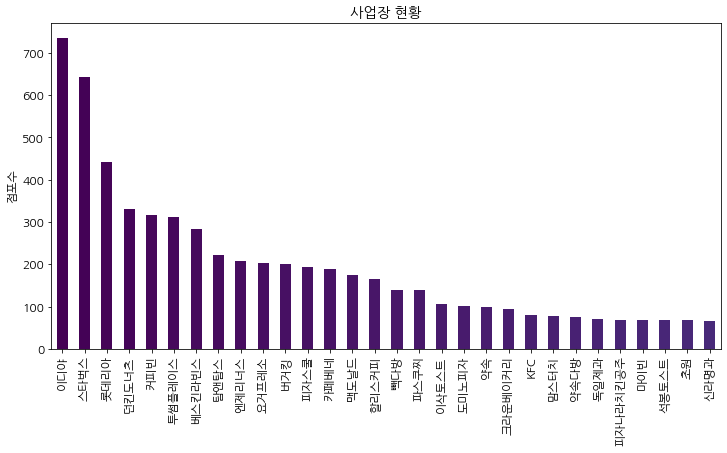

In [64]:
사업장30.plot(kind='bar', figsize=(12,6), title='사업장 현황', ylabel='점포수', color=plt.cm.viridis(np.arange(30)))

### 자 그런데 동일한 컬러만 출력된다. 왜일까? 이것은 컬러맵의 수치가 너무 커서 그런 이유로 색상을 표현하지 못하는 걸 수도 있다. 

<AxesSubplot:title={'center':'사업장 현황'}, ylabel='점포수'>

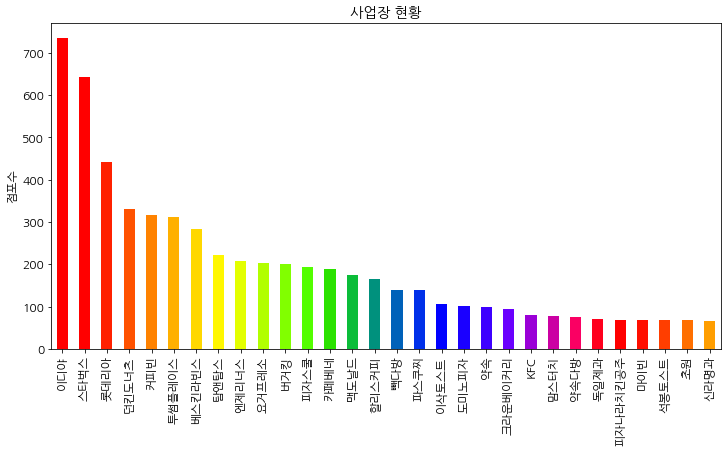

In [65]:
사업장30.plot(kind='bar', figsize=(12,6), title='사업장 현황', ylabel='점포수', color=plt.cm.prism(np.arange(30)))

### 막대 그래프는 막대 색이 데이터의 방향성과 관련되서 중요한데, 이 데이터를 보면 명목형이구나, 정량적이구나, 파악해서 구분해서 넣으면 된다.
#### 정량형 데이터는 색깔을 똑같이 하는게 좋을 것이고,
#### 정상형 데이터는 컬러로 표시하면 좋을 것이다. 아무튼 확실한 데이터는, 이디야가 가장 데이터가 많다. 근데 실질적인 갯수를 파악해야겠지?
#### 이제 데이터의 갯수를 줄이고, 구체적인 수치를 파악하자.

<AxesSubplot:title={'center':'사업장 현황'}, ylabel='점포수'>

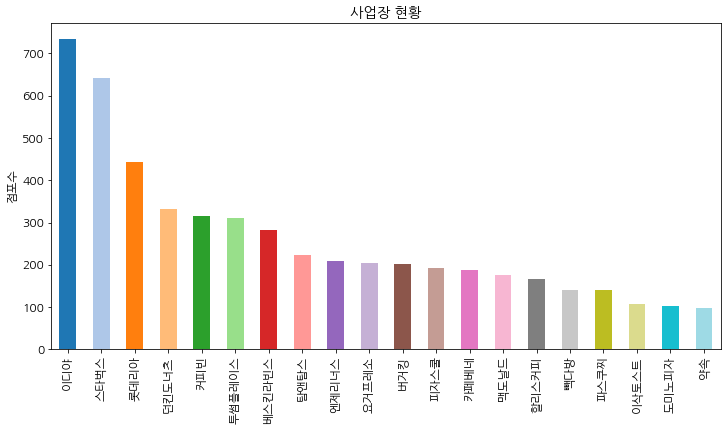

In [67]:
사업장30[:20].plot(kind='bar', figsize=(12,6), title='사업장 현황', ylabel='점포수', color=plt.cm.tab20(np.arange(30)))

TypeError: annotate() missing 1 required positional argument: 'xy'

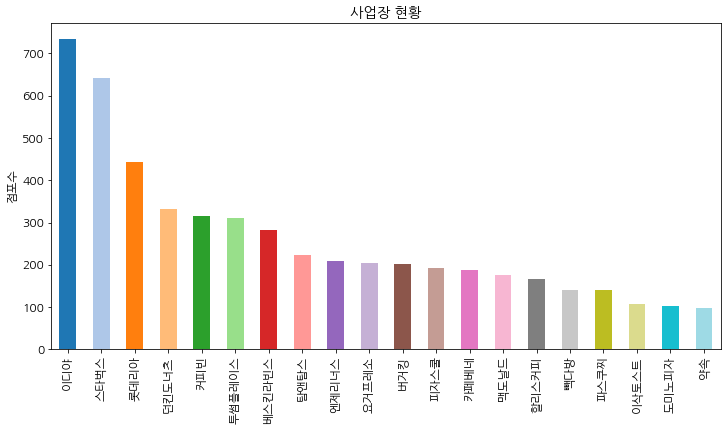

In [69]:
# 자, 그러면 마지막에 약속이라는 음식점이 보이죠? 자 이제 글자를 찍어야할 건데, 이제 해야할 것.

ax = 사업장30[:20].plot(kind='bar', figsize=(12,6), title='사업장 현황', ylabel='점포수', color=plt.cm.tab20(np.arange(30)))

# ax라고 변수를 따로 만들어줍니다.
# annotate 를 사용하는 방법은 이렇습니다.(x좌표, y좌표, 표시할 값, 크기나 여러가지 옵션등을 사용할 수 있습니다.
# 숫자를 표시할려면 막대 높이 만큼 표시하도록 코드를 넣어줘야겠죠?

for p in ax.patches:ax.annotate(p.get_height())
ax

##### 자 그런데 argument 'xy' 값이 없어서 안된다는 에러가 뜬다. 그러니까 해야할 작업.

<AxesSubplot:title={'center':'사업장 현황'}, ylabel='점포수'>

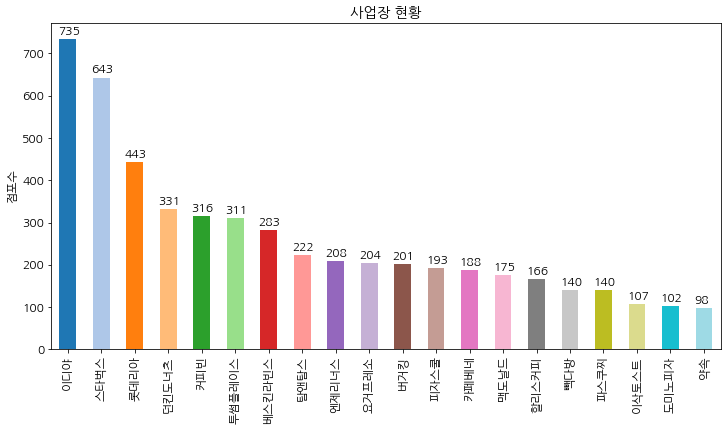

In [80]:
ax = 사업장30[:20].plot(kind='bar', figsize=(12,6), title='사업장 현황', ylabel='점포수', color=plt.cm.tab20(np.arange(30)))

# p.get_x(), p.get_height())) 수치를 막대그래프 위에 표현해 주기.

for p in ax.patches:ax.annotate(p.get_height(), (p.get_x()-0.05, p.get_height()+10) )
ax

### 이런식으로 보기 수월하게 표현이 가능하다. 그래프 위에 숫자까지 표시해서 구체화된 수치도 표기하여 그래프의 시각적인 가치를 높였다.
### 자 이제 총 커피숍이 몇개인지 그럼 이제 파악해볼까?

### 서울의 커피숍은 모두 몇개나 될까? 10위권까지 한번 표현해보자.

In [82]:
#  43  전통업소주된음식. 음식 타입인 것 같다. 그럼 이것만 간추려보자.

sf1 = sf.iloc[:, [19,45,23,46,47,40,16,48,49,43]] # iloc 함수가 분류하는 것인가? 
sf1.head()

,사업장명,지역구,업태구분명,open,closed,다중이용업소여부,지번주소,경도,위도,전통업소주된음식
0,통불 이마트청계천점,중구,일반조리판매,2020,NaN,NaN,서울특별시 중구 황학동 2545 이마트 청계천점,127.021434,37.570978,NaN
1,씨유 길음푸르지오점,성북구,편의점,2020,NaN,NaN,서울특별시 성북구 길음동 1280-6 대우상가,127.017973,37.610872,NaN
2,스타벅스,송파구,커피숍,2020,NaN,NaN,서울특별시 송파구 방이동 44-3 현대토픽스,127.113106,37.516942,NaN
3,Min's coffee,동대문구,커피숍,2020,NaN,NaN,서울특별시 동대문구 전농동 38-104,127.060378,37.578112,NaN
4,탑브릭스,강북구,일반조리판매,2020,NaN,NaN,서울특별시 강북구 수유동 413-25,127.015425,37.636170,NaN


In [86]:
업태구분 = sf1.업태구분명.value_counts() 
# Valuecounts()꼭 기억할것!! 
업태구분 = 업태구분.sort_values(ascending=False)
업태구분

커피숍         27222
일반조리판매      17709
다방          17249
기타 휴게음식점    14003
패스트푸드        9748
편의점          9240
과자점          8074
백화점          2604
푸드트럭          918
철도역구내         424
아이스크림         389
전통찻집          332
떡카페           144
키즈카페          126
관광호텔           80
유원지            59
극장             19
공항             17
고속도로            7
기타              2
한식              2
호프/통닭           1
김밥(도시락)         1
룸살롱             1
단란주점            1
Name: 업태구분명, dtype: int64

### 말마따나 커피숍이 많죠?
### 보기 편하게 15개 정도만 간추려서 plot으로 시각화하자.

<AxesSubplot:>

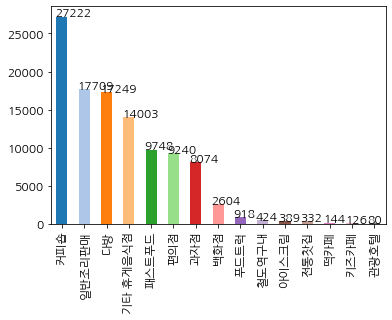

In [91]:
ax = 업태구분[:15].plot(kind='bar', color=plt.cm.tab20(np.arange(20)))

for p in ax.patches:ax.annotate(p.get_height(), (p.get_x()-0.05, p.get_height()+10) )
ax

## 글자가 막대 그래프에 너무 붙는 위치로 되어있기 때문에 height 값을 높여야한다.

<AxesSubplot:>

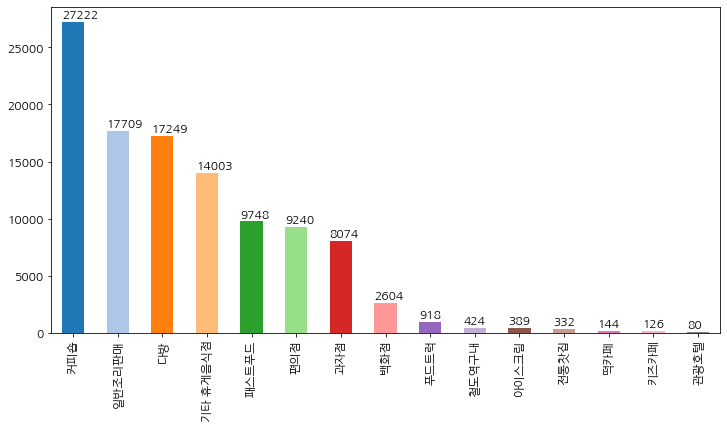

In [95]:
# 그래프 수치 간격이 좁아서 넓게 그래프를 그릴려면 figsize=(12,6) 정도로 넣어보자

ax = 업태구분[:15].plot(kind='bar', figsize=(12,6), color=plt.cm.tab20(np.arange(20)))

for p in ax.patches:ax.annotate(p.get_height(), (p.get_x(), p.get_height()+300) )
ax

<AxesSubplot:>

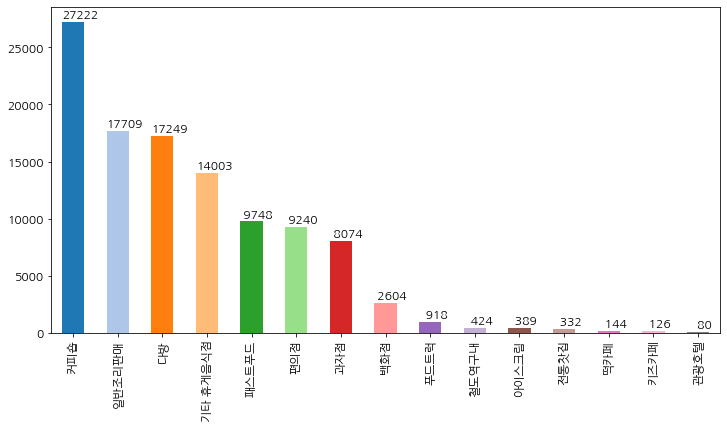

In [98]:
ax = 업태구분[:15].plot(kind='bar', figsize=(12,6), color=plt.cm.tab20(np.arange(20)))

# '{:5d}' 값으로 정렬 

for p in ax.patches:ax.annotate( '{:5d}'.format(p.get_height() ), (p.get_x(), p.get_height()+300) )
ax

In [99]:
# 다방의 갯수가 17,249개 - 다방의 종류는 무엇일까?
search = sf1.업태구분명 == '다방'
다방 = sf1[search]
다방.head()

,사업장명,지역구,업태구분명,open,closed,다중이용업소여부,지번주소,경도,위도,전통업소주된음식
37,상록수,금천구,다방,1967,NaN,NaN,서울특별시 종로구 종로5가 193-17,126.899804,37.457790,NaN
51,케이브커피(KAVE coffee),노원구,다방,2020,NaN,NaN,서울특별시 서대문구 대현동 27-20 신촌가이아,127.054843,37.676224,NaN
74,국민우유집,송파구,다방,2020,NaN,NaN,서울특별시 서대문구 남가좌동 324-28 명지하우스 101호,127.103433,37.513101,NaN
149,왕비,용산구,다방,1981,NaN,N,서울특별시 종로구 신문로2가 1-355번지,127.045947,37.549011,NaN
160,이젠,중구,다방,2013,2020.0,NaN,서울특별시 강남구 논현동 10-25 교하빌딩 1층 101호,127.030090,37.484354,NaN


## 다방의 갯수 파악

In [107]:
다방.사업장명.value_counts().sort_values(ascending=False).head(20)

약속      94
약속다방    73
커피타임    59
팡세      58
솔       57
초원      55
제일      54
정       52
태양      51
영       49
영다방     46
정다방     46
중앙다방    44
수정      44
한일      43
양지      42
궁전      41
귀빈      40
장미      39
중앙      39
Name: 사업장명, dtype: int64

### 년도별 다방의 갯수는 ? 다방의 데이터 프레임을 만들어보자.

In [106]:
# open 컬럼과 사업장명, 사업장명을 count()해서 개업다방점 데이터 프레임 만들기.

개업다방 = 다방.groupby(['open', '사업장명'])['사업장명'].count()

개업다방.sort_values(ascending=False)

# 너무 많으니까 20개만 찍어보자.

개업다방[:20]

open  사업장명    
1899  용궁다방        1
      해태다방        1
1900  청자          1
1904  .           1
      피터팬         1
1913  린네스가든       1
1931  자뎅커피타운본점    1
      터틀          1
1936  정동          1
1948  볼라커피숍       1
1964  빌라노바        1
      청수          1
1965  길           1
      봉다방         1
      삼성          1
      영           1
      태을          1
      파리          1
      호수          1
1966  남지다방        1
Name: 사업장명, dtype: int64

### 앞에 그래프를 그렸던 것은 open 한 것만 위주로 카운팅한거고, 지금 년을 기준으로 close가 Nan인 데이터를 것만 놓아서 다시 집계를 내면, 태업한 업소만 빼고 볼 수 있을 것이다.

### 구별로 몇개의 스타벅스가 존재하는지 시각화
### 강남구에 존재하는 스타벅스의 위치를 지도에 시각화 해보자.

In [112]:
# Step 1 = 구별로 몇개의 이디아/스타벅스가 존재하는지 시각화를 해보자.

스타벅스 = sf1[sf1.사업장명 == '스타벅스']
스타벅스.head()

이디야 = sf1[sf1.사업장명 == '이디야']
이디야.head()




스타벅스.지역구.value_counts().sort_values(ascending=False)[:10]

Series([], Name: 지역구, dtype: int64)

In [116]:
# 지금 현재 영업중인 매장을 대상으로 다시 추출
스타벅스 = sf1[(sf1.사업장명 == '스타벅스') & \
           (sf1.closed.isnull())] # 결측치 제거하기

스타벅스.head() # 643 - 518

,사업장명,지역구,업태구분명,open,closed,다중이용업소여부,지번주소,경도,위도,전통업소주된음식
2,스타벅스,송파구,커피숍,2020,NaN,NaN,서울특별시 송파구 방이동 44-3 현대토픽스,127.113106,37.516942,NaN
106,스타벅스,마포구,커피숍,2020,NaN,NaN,서울특별시 강남구 삼성동 108-6번지 JBK TOWER 빌딩,126.899030,37.569992,NaN
163,스타벅스,동작구,커피숍,2018,NaN,NaN,서울특별시 서초구 서초동 1365-23번지 1층,127.018017,37.482788,NaN
183,스타벅스,서대문구,커피숍,2020,NaN,NaN,서울특별시 강남구 역삼동 702-10 아남타워빌딩,127.138372,37.544185,NaN
313,스타벅스,서초구,커피숍,2003,NaN,NaN,서울특별시 서초구 서초동 1657-5번지 1층,127.018789,37.493376,NaN


### 이렇게하면 각 각 구당 이디야,스타벅스 커피점의 숫자를 확인이 가능하다.

In [118]:
이디야 = sf1[(sf1.사업장명 == '이디야')  & \
           (sf1.closed.isnull())]
이디야.head()

,사업장명,지역구,업태구분명,open,closed,다중이용업소여부,지번주소,경도,위도,전통업소주된음식
42,이디야,중구,커피숍,2020,NaN,NaN,서울특별시 서초구 양재동 273-2 1층,126.988638,37.564465,NaN
147,이디야,노원구,커피숍,2019,NaN,NaN,서울특별시 송파구 문정동 150번지 올림픽훼밀리타운,126.971671,37.536150,NaN
350,이디야,강동구,커피숍,2018,NaN,NaN,서울특별시 중구 신당동 373-70번지,127.027750,37.586012,NaN
399,이디야,노원구,커피숍,2016,NaN,NaN,서울특별시 송파구 문정동 640번지 케이디유타워,126.964918,37.581745,NaN
472,이디야,강남구,커피숍,2008,NaN,NaN,서울특별시 중구 을지로6가 18-37번지,126.988101,37.569935,NaN


### 이 데이터를 확인해보면 폐업률이 스타벅스 보다는 이디야가 더 높다는 것을 확인할 수 있다.
### 이것으로 자기가 창업을 할려면, 이디야보다는 스타벅스로 창업을 할 수 있겠구나.라고 판단이 가능하다는 것이다.

### 강남구에 존재하는 스타벅스의 위치를 지도에 시각화 해보자.

In [124]:
강남스벅 = 스타벅스[스타벅스.지역구 == '강남구']
강남스벅.head()

강남이댜 = 이디야[이디야.지역구 == '강남구']
강남이댜.head()

latlng = []
for i in range(len(강남스벅)):
    latlng.append((강남스벅.iloc[i, 8], 강남스벅.iloc[i, 7]))

latlng[:5]

[(37.59870427015345, 127.0571290905954),
 (37.49409942941632, 127.03264458669362),
 (37.55899169480882, 126.9438829804128),
 (37.51061808078643, 127.08035533242426),
 (37.50342724992147, 127.10635722249192)]

In [125]:
import googlemaps as ggmaps
import gmaps
from ipywidgets.embed import embed_minimal_html

my key = 'AIzaSyBTduQ1nN1Wm11A2G



ModuleNotFoundError: No module named 'gmaps'